<a href="https://colab.research.google.com/github/anna030608/DS/blob/master/Quest_260127/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

### 데이터셋
- 영국 온라인 리테일 쇼핑몰의 실제 거래 로그 데이터    
-> "언제, 누가, 어떤 상품을, 몇 개, 얼마에 샀는지"를 기록한 Transaction Data
- 541,909 건
---
- InvoiceNo (주문 번호)
  - 'C'로 시작 : 취소/반
- StockCode (상품 코드)
- Description (상품 설명)
- Quantity (구매 수량)
  - 음수 존재 -> 반품/취
- InvoiceDate (구매 시각)
- UnitPrice (상품 단가)
- CustomerID (고객 ID)
- Country (국가)
- TotalPrice (파생 변수)
  - 한 상품 라인의 실제 매출 금액
- DayOfWeek (파생 변수) (요일)
- InvoiceMonth (파생 변수) (월)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [8]:
# 재현성을 위한 시드 고정!!
np.random.seed(42)

# 모집단 TotalPrice
population = df["TotalPrice"]

# 표본 추출 1000개
sample = population.sample(n=1000, random_state=42)

In [9]:
# 모집단 통계량
pop_mean = population.mean()
pop_std = population.std()

# 표본 통계량
sample_mean = sample.mean()
sample_std = sample.std()

print("모집단 평균:", pop_mean)
print("모집단 표준편차:", pop_std)
print("------------------------------------")
print("표본 평균:", sample_mean)
print("표본 표준편차:", sample_std)

모집단 평균: 17.98779487699964
모집단 표준편차: 378.81082350615196
------------------------------------
표본 평균: 16.832069999999998
표본 표준편차: 64.46732773087352


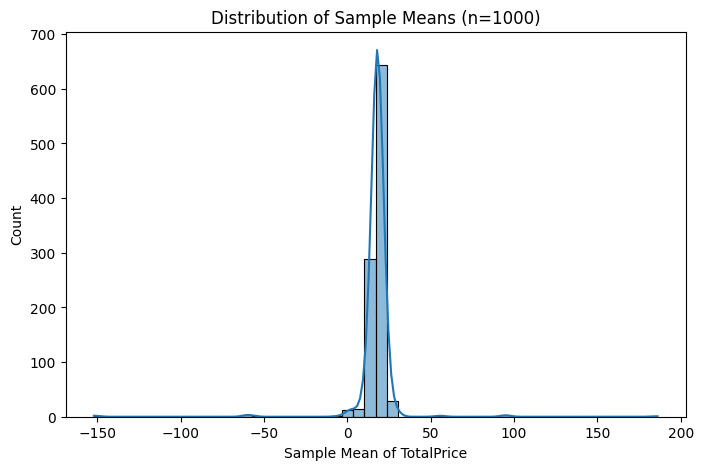

In [10]:
# 표본 평균 여러 번 계산.
sample_means = []

for i in range(1000):
    temp_sample = population.sample(n=1000)
    sample_means.append(temp_sample.mean())

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, bins=50, kde=True)
plt.title("Distribution of Sample Means (n=1000)")
plt.xlabel("Sample Mean of TotalPrice")
plt.show()

- 모집단 : 전체 거래 데이터의 TotalPrice
- 표본 : 모집단에서 무작위로 추출한 1000개 거래
- 비교 대상 : 평균, 표준편차
---
### 결과 해석
- 모집단 평균: 17.99
- 모집단 표준편차: 378.81    
-> 평균은 크지 않지만 표준편차가 매우 크다.    
-> 개별 거래 금액은 극단적으로 변동성이 큰 분포임.
---
- 표본 평균: 16.83
- 표본 표준편차: 64.47    
-> 표본 평균은 모집단 평균과 매우 유사한 값.    
-> 무작위로 추출하는 과정에서 극단값이 일부 완화되고, 표본 크기가 1000이기 때문에 분산이 안정화되는 효과로 표본 표준편차가 모집단보다 작아진 것 같다.
---
- 표본 평균을 여러번 반복했을 때의 분포를 시각화한 그래프를 보면,  
정규분포 형태에 가깝고, 좌우 대칭성이 우수하다.    
- 그리고 분산이 매우 작다. (분포 폭이 매우 좁음)
---   
=> TotalPrice의 개별 관측값은 표준편차가 378로 매우 큰 비정규 분포를 따르지만, 표본 크기를 n=1000으로 설정하여 반복적으로 표본 평균을 계산한 결과, 표본 평균의 분포는 정규분포에 근사함을 확인할 수 있었다.이는 중심극한정리에 따라 충분히 큰 표본에서는 표본 평균이 모집단 평균을 안정적으로 추정할 수 있음을 의미한다.
따라서 단일 표본의 평균이 모집단 평균과 약간 차이를 보이더라도, 이러한 차이는 자연스러운 표본 오차 범위 내에 있고 표본 기반 추정이 통계적으로 타당함을 확인하였다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [11]:
# 상위 두 국가의 주문수
df['Country'].value_counts().head(2)

,count
Country,
United Kingdom,495478
Germany,9495


In [12]:
# 주문이 가장 많은 두 국가 저장.
top2_countries = df['Country'].value_counts().head(2).index.tolist()
top2_countries

['United Kingdom', 'Germany']

In [13]:
# 두 국가별 TotalPrice값 분리해서 저장.
country1, country2 = top2_countries

data1 = df[df['Country']==country1]['TotalPrice']
data2 = df[df['Country']==country2]['TotalPrice']

data1.mean(), data2.mean()

(np.float64(16.525065419655366), np.float64(23.348942601369142))

In [14]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -10.046360185819829
p-value: 9.823416115791871e-24


### 결과 해석
---
- 비교 대상 국가
  - United Kingdom : 495,478 건
  - Germany: 9,495 건    
  -> 두 집단은 서로 독립이며, 표본 크기가 매우 불균형하다.
---
- TotalaPrice의 평균 비교
  - UK 평균 : 16.53
  - Germany 평균 : 23.35    
  -> 표본 평균만 보면, 독일의 평균 주문 금액이 영국보다 더 크다.
---
- t-검정 결과
  - t-statistic: -10.05
  - p-value: 9.82 × 10⁻²⁴
- t-통계량
  - 두 집단 평균 차이가 표준오차 대비 몇 배나 떨어져 있는지를 나타내는 값.
  - 절댓값 = 10.05로 매우 큰 값.
  - 음수 부호 : t < 0, 첫번째 집단 UK의 평균이 두번째 집단인 Germany보다 작다는 뜻.
- p-value
  - 9.82 × 10⁻²⁴
  - 거의 0에 수렴하는 값.
  - 일반적인 유의수준 0.05와 비교하면, 0.05 ≫ 0.0000000000000000000000098
- 귀무가설(H0: 두 국가 평균은 같다) 기각.
- 두 국가 간 TotalPrice 평균 차이는 통계적으로 매우 유의미하다.
---
=> 주문 수를 기준으로 상위 두 국가 (United Kingdom, Germany)를 대상으로 독립표본 t-검정을 수행한 결과,    
두 국가의 평균 TotalPrice 간 차이는 통계적으로 유의미하였다.     
(t = -10.05, p < 0.05)    
이는 국가별 주문 금액 특성에 실절적인 차이가 존재함을 의미한다.    
=> 유의수준 α = 0.05    
1종 오류란, 실제로 차이가 없는데, 있다고 판단하는 오류를 말한다.    
2종 오류란, 실제로 차이가 있는데, 없다고 판단하는 오류를 말한다.     

본 분석은 유의수준 0.05하에서 수행되었으며,    
p < 0.05로 귀무가설을 기각함으로써 약 5%의 1존 오류 가능성을 감수하였다.    
하지만, p-value가 매우 작은 값으로, 1종 오류일 가능성은 극히 낮다고 판단된다.    
반대로 실제 차이를 놓치는 2종 오류의 가능성은 거의 없다고 볼 수 있다.     
=> 두 집단이 구조적으로 다르다는 것을 보여주는 근거가 된다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [15]:
### 주중과 주말에 판매되는 상품의 단가 UnitPrice 분포가 다른가??

# 주중(0~4), 주말(5~6) 데이터 분리
weekday = df[df['DayOfWeek'] < 5]['UnitPrice']
weekend = df[df['DayOfWeek'] >= 5]['UnitPrice']

In [16]:
def summarize(series):
    return {
        "mean": series.mean(),
        "median": series.median(),
        "std": series.std(),
        "var": series.var(),
        "Q1": series.quantile(0.25),
        "Q3": series.quantile(0.75)
    }

weekday_summary = summarize(weekday)
weekend_summary = summarize(weekend)

weekday_summary, weekend_summary

({'mean': np.float64(4.843425333065292),
  'median': 2.1,
  'std': 103.03205776157508,
  'var': 10615.604926584541,
  'Q1': np.float64(1.25),
  'Q3': np.float64(4.13)},
 {'mean': np.float64(2.8878244815533978),
  'median': 1.85,
  'std': 7.959497387498285,
  'var': 63.353598661592024,
  'Q1': np.float64(1.25),
  'Q3': np.float64(3.75)})

### 중심경향치 해석
- 주중의 평균 UnitPrice가 주말보다 높다.    
- 중간값은 두 집단에서 매우 유사하다.    
- 평균 차이가 일반적인 가격 차이보다는, 이상치의 영향임을 시사한다.    
=> 일반적인 상품 가격 수준은 서로 유사하다.
---
- 주중의 표준편차와 분산이 매우 크다.
  - 주중에 소수의 매우 고가 상품이 존재함을 의미함.
- 주말은 상대적으로 가격 분포가 더 안정적이다.
---
- Q1, Q3값이 거의 유사하다.
- IQR도 큰 차이가 없다.    
=> 대부분의 상품 가격대는 주중,주말 간 유사한 범위에 분포한다.


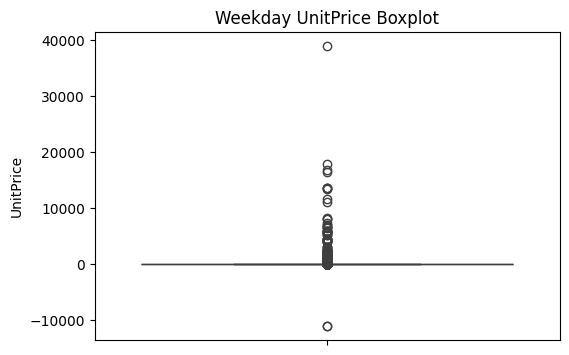

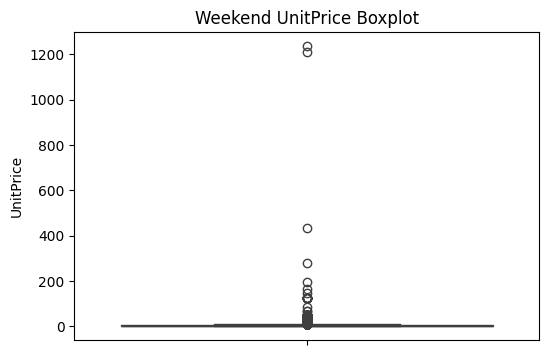

In [17]:
# 상자 수엽 그림 BoxPlot
# 주중 박스플롯
plt.figure(figsize=(6, 4))
sns.boxplot(y=weekday)
plt.title("Weekday UnitPrice Boxplot")
plt.show()

# 주말 박스플롯
plt.figure(figsize=(6, 4))
sns.boxplot(y=weekend)
plt.title("Weekend UnitPrice Boxplot")
plt.show()


### Boxplot 해석
- 두 분포 모두 강한 비대칭 분포이다.
- IQR은 낮은 가격대에 밀집되어 있다.    
=> 주중과 주말의 전반적인 분포 구조는 유사하지만,    
주중에 극단적인 고가 상품이 더 자주 관찰됨을 알 수 있다.

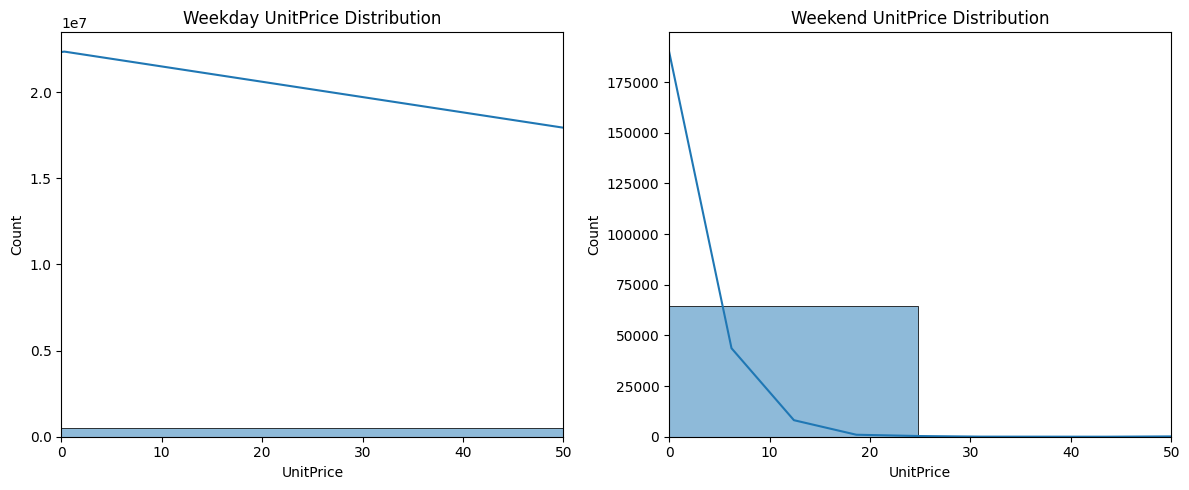

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(weekday, bins=50, kde=True)
plt.title("Weekday UnitPrice Distribution")
plt.xlim(0, 50)

plt.subplot(1, 2, 2)
sns.histplot(weekend, bins=50, kde=True)
plt.title("Weekend UnitPrice Distribution")
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

#### Histogram 해석
- 주중보단 주말에 낮은 가격대에 관측지가 집중되어 있다.
- 주중 분포가 꼬리가 더 길게 나타난다.
---

### 종합 해석
- 주중과 주말의 일반적인 상품 가격 수준은 유사하지만,    
주중에 소수의 고가 상품이 더 많이 존재하여 분포의 상단 꼬리에서 차이가 나타난다.
---

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [19]:
df_reg = df.copy()

### 결측치 처리
df_reg = df_reg.dropna(subset=['Country', 'UnitPrice', 'Quantity'])

In [20]:
df_reg.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,1.844709,3.509055


In [21]:
### 이상치 처리

# Quantity에 음수값 존재 (반품/취소) -> 제거
df_reg = df_reg[df_reg['Quantity'] > 0]

# UnitPrice가 0 이하인 경우 제거
df_reg = df_reg[df_reg['UnitPrice'] > 0]

In [22]:
## 극단값 제거
df_reg = df_reg[df_reg['Quantity'] < 50000]

In [23]:
df_reg.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,530102.000000,530102,530102.000000,397882.000000,530102.000000,530102.000000,530102.000000
mean,10.249284,2011-07-04 20:16:06.836419840,3.907634,15294.427969,19.658540,2.436625,7.560615
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.001000,0.000000,1.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000,3.750000,1.000000,5.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000,9.900000,2.000000,8.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000,17.700000,4.000000,11.000000
max,4800.000000,2011-12-09 12:50:00,13541.330000,18287.000000,38970.000000,6.000000,12.000000
std,37.793548,NaN,35.915749,1713.138517,91.283422,1.850652,3.508485


In [24]:
### 범주형 변수 처리 Country
df_reg = pd.get_dummies(df_reg, columns=['Country'], drop_first=True)

In [25]:
### 회귀 모델.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df_reg[['UnitPrice', 'DayOfWeek', 'InvoiceMonth'] +
           [col for col in df_reg.columns if col.startswith('Country_')]]

y = df_reg['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 회귀계수, 결정계수 확인하기
coefficients = pd.Series(model.coef_, index=X.columns)
r2 = r2_score(y_test, y_pred)

print("회귀계수: ")
print(coefficients)
print("\n결정계수 (R^2): ", r2)

회귀계수: 
UnitPrice                       -0.014070
DayOfWeek                       -0.208893
InvoiceMonth                    -0.030207
Country_Austria                -58.779041
Country_Bahrain                -60.994058
Country_Belgium                -59.619157
Country_Brazil                 -60.245040
Country_Canada                 -52.548006
Country_Channel Islands        -58.088650
Country_Cyprus                 -61.635724
Country_Czech Republic         -41.382262
Country_Denmark                -49.752326
Country_EIRE                   -52.428935
Country_European Community     -62.179347
Country_Finland                -55.342090
Country_France                 -57.865544
Country_Germany                -57.752913
Country_Greece                 -60.586226
Country_Hong Kong              -54.780903
Country_Iceland                -57.177616
Country_Israel                 -56.462413
Country_Italy                  -60.540399
Country_Japan                    2.211982
Country_Lebanon            

### 데이터 전처리
- 결측값 제거
- 이상치 제거
  - "판매 수량 예측"이라는 목적상 반품 항목은 제외하였다.
  - Quantity > 50000인 데이터가 2건밖에 없었는데, 이 데이터가 해석에 큰 영향을 줄 것이라 판단하고, 제거하였다.
---


### 회귀 분석 결과
종속변수: 판매 수량 (Quantity)
독립변수:
- 연속형: UnitPrice, DayOfWeek, InvoiceMonth
- 범주형: Country (더미 변수, 기준국가 존재)
결정계수 (R²): 0.0377
---
1. UnitPrice 계수: -0.014
- 상품 단가가 1단위 증가할 때, 다른 조건이 동일하다면 평균 판매 수량은 약 0.014만큼 감소    
=> 고가 상품일수록 한번에 구매되는 수량은 줄어드는 경향이 있다.
2. DayOfWeek 계수: -0.209
- 요일 값이 1증가할수록 (주 후반으로 갈수록 ) 평균 판매 수량은 약 0.21 감소    
=> 주 후반/주말로 갈수록 건단 구매 수량은 조금 감소하지만, 계수 크기가 매우 작아 실질적인 영향을 제한적이다.
3. InvoiceMonth 계수: -0.030
- 월이 1증가할 때, 평균 판매 수량이 약 0.03 감소    
=> 연중 후반으로 갈수록 수량인 약간 감소하는 경향성이 있다. 판매수량에 월별 영향은 존재하나 크진 않다.
4. 국가 Country 더미 변수
- 대부분 음수.    
=> 기준 국가 대비, 동일한 조건에서도 한 주문당 판매 수량이 매우 적음을 알 수 있다.
- 일부 양수값의 일부 국가가 있지만, 이는 표본 수가 적은 국가일 가능성이 크므로 이 점을 유의해야 한다.
---
### 결정계수(R² = 0.0377) 해석
- 모댈이 판매 수량 변동의 약 3.8%만 설명.
- 판매 수량은 상품 단가, 국가, 날짜 외에도 상품 종류, 고객 특성, 시즌별 이벤트 등 다양한 요인에 의해 결정된다.    
그래서 낮은 결정계수 값은 정상적인 결과라고 볼 수 있다.    
본 모델은 판매 수량에 영향을 미치는 요인을 탐색하는 설명 모델로서 의미를 가진다.    
=> 판매 수량은 가격과 국가의 영향을 받지만, 날짜 변수의 영향은 제한적이고 설명력은 낮아서 추가 요인이 필요하다고 본다.
---


## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [26]:
### 문제 정의
### -> 거래 정보와 상품 정보를 기반으로
###    해당 거래가 반품될(Return) 가능성이 있는가?
### -> 이진 분류 문제 (Binary Classification)
### 종속 변수 : IsReturn (0 / 1)
### 모델 : Logistic Regression

In [27]:
### IsReturn 피쳐 생성
df_cls = df.copy()

df_cls['IsReturn'] = (df_cls['Quantity'] < 0).astype(int)
# IsReturn = 1 -> 반품
# IsReturn = 0 -> 정상 구매

In [28]:
### 결측치 처리
df_cls = df_cls.dropna()

In [29]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   TotalPrice    406829 non-null  float64       
 9   DayOfWeek     406829 non-null  int32         
 10  InvoiceMonth  406829 non-null  int32         
 11  IsReturn      406829 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(4)
memory usage: 37.2+ MB


In [30]:
df_cls.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854,2.606402,7.605947,0.021889
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000,0.000000,1.000000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000,1.000000,5.000000,0.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000,2.000000,8.000000,0.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000,4.000000,11.000000,0.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000,1.000000
std,248.693370,NaN,69.315162,1713.600303,427.591718,1.921907,3.418942,0.146321


In [31]:
### 이상치 처리
df_cls = df_cls[df_cls['Quantity'] < 50000]
df_cls = df_cls[df_cls['Quantity'] > -50000]

In [32]:
df_cls.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth,IsReturn
count,406825.000000,406825,406825.000000,406825.000000,406825.000000,406825.000000,406825.000000,406825.000000
mean,12.061422,2011-07-10 16:31:07.038505728,3.460490,15287.699338,20.402054,2.606403,7.605958,0.021884
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000,-38970.000000,0.000000,1.000000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000,1.000000,5.000000,0.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000,2.000000,8.000000,0.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000,4.000000,11.000000,0.000000
max,12540.000000,2011-12-09 12:50:00,38970.000000,18287.000000,38970.000000,6.000000,12.000000,1.000000
std,50.208125,NaN,69.315502,1713.594390,118.405700,1.921911,3.418914,0.146305


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_cls = pd.get_dummies(df_cls, columns=['Country'], drop_first=True)

X = df_cls[['UnitPrice', 'DayOfWeek', 'InvoiceMonth'] +
           [c for c in df_cls.columns if c.startswith('Country_')]]

y = df_cls['IsReturn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
### 혼동행렬
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[79582,     2],
       [ 1780,     1]])

In [35]:
## 정밀도, 재현율, F1-Score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     79584
           1       0.33      0.00      0.00      1781

    accuracy                           0.98     81365
   macro avg       0.66      0.50      0.50     81365
weighted avg       0.96      0.98      0.97     81365



### 로지스틱 회귀 결과 해석
---
1. 혼동행렬 해석    
[[79582,     2],    
 [ 1780,     1]]    
- TN = 79,582
- FN = 1,780
- FP = 2
- TP = 1    
-> 모델이 거의 모든 데이터를 '정상 거래'로 예측함.
  - 반품(1)을 1781건 중 단 1건만 맞췄음.
  - 반품을 거의 전혀 잡아내지 못했음.
---
2. 평가 지표 해석
- 정상 거래 recall : 1.00
- 정상 거래 precision : 0.98


-> 하지만, 의미 없음.
- 반품 클래스 recall = 0.00
- 반품 클래스 precision = 0.33

-> 이 모델은 반품을 거의 전혀 탐지하지 못함.
- 반품 클래스  F1-score = 0.00

-> 반품 예측 모델로서 실패했다고 봐도 무방하다.
- Weighted avg = 0.97
- Macro avg = 0.50

-> 다수 정상 클래스가 지배하여 실제 성능을 왜곡.    
-> 클래스별 성능을 0.5 동등하게 평가함을 볼 수 있음.


## 성능 개선

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 1. class_weight = 'balanced'
- 반품 클래스 (1)의 손실 가중치를 자동을 키워 성능을 개선.

In [37]:
model_bal = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model_bal.fit(X_train, y_train)

y_pred_bal = model_bal.predict(X_test)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

[[53353 26231]
 [  890   891]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80     79584
           1       0.03      0.50      0.06      1781

    accuracy                           0.67     81365
   macro avg       0.51      0.59      0.43     81365
weighted avg       0.96      0.67      0.78     81365



### 2. 비선형 모델 (RandomForest)
- 반품 패턴은 선형이 아닐 가능성이 크다고 판단을 하여, 기존의 선형 기반 모델이 아닌, 비선형 모델인 randomforest 모델을 사용하여 성능 개선을 시도하였다.

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[61520 18064]
 [  969   812]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     79584
           1       0.04      0.46      0.08      1781

    accuracy                           0.77     81365
   macro avg       0.51      0.61      0.47     81365
weighted avg       0.96      0.77      0.85     81365

